In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.utils import plot_model
from importlib.resources import path
import numpy as np
import matplotlib.pyplot as plt

2022-09-06 23:08:55.361894: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-09-06 23:08:55.505592: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-06 23:08:55.505619: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
(X_train, Y_train), (x_test, y_test) = mnist.load_data()

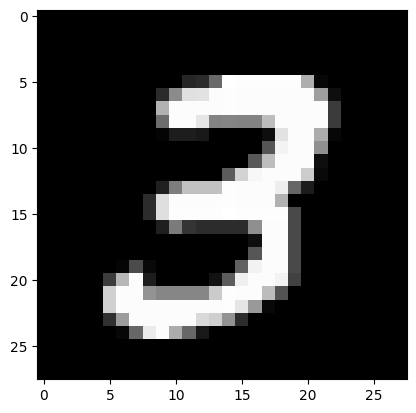

In [3]:
plt.imshow(X_train[7], cmap="gray")
plt.show()

Here I am normalizing the data instead of being form 0 to 255 I am making it between 0 and 1

In [4]:
from tensorflow.keras.utils import normalize


X_train = normalize(X_train, axis=1)
x_test = normalize(x_test, axis=1)

Here we I will create the neural network that I will train to classify the digits.

In [5]:
model = Sequential([
    Flatten(),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10)
])

2022-09-06 23:09:39.744541: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-06 23:09:39.745066: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-06 23:09:39.745144: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-09-06 23:09:39.745187: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-09-06 23:09:39.745229: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

Now after creating the neural network, I will train it on the MNIST dataset

In [6]:
model.compile(
    optimizer=Adam(0.001),
    loss=SparseCategoricalCrossentropy(from_logits=True)
)

model.fit(
    X_train, 
    Y_train,
    epochs=20
)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2636
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1070
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0723
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0528
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0406
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0303
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0249
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0214
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0160
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0159
Epoch 11/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0141
Epoch 12/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0114
E

Here we will store the predicitons from the test dataset. 

In [7]:
predictions = model.predict([x_test])

313/313 [==============================] - 0s 1ms/step


Here we are trying to display the results of some predictions.

9


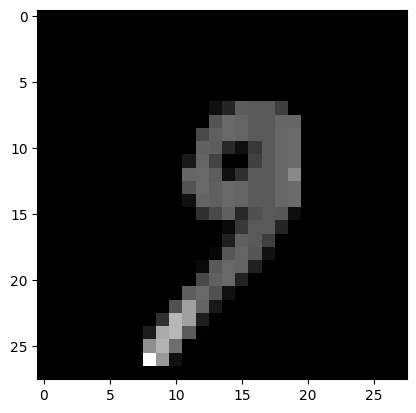

In [8]:
print(np.argmax(predictions[1000]))
plt.imshow(x_test[1000], cmap='gray')
plt.show()

Finally, here is the accuracy of the model:

In [12]:
model_loss = model.evaluate(X_train, Y_train)
model_accuracy = (1 - model_loss) * 100

1875/1875 [==============================] - 3s 1ms/step - loss: 0.0065


In [13]:
print(f'the accuracy of my model is: {model_accuracy}%')

the accuracy of my model is: 99.35216791927814%


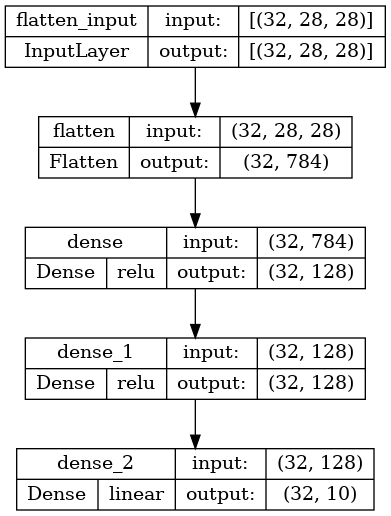

In [26]:
plot_model(
    model, 
    to_file='NN_model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TL",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
)